In [1]:
import requests
import pandas as pd
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

# External data

In [2]:
df_external_BTC = pd.read_csv('data\external_alltime\Bitcoin Historical Data - Investing.com.csv',thousands=',')
df_external_BTC['Date'] = pd.to_datetime(df_external_BTC['Date'], format='%b %d, %Y')

In [3]:
df_external_ETH = pd.read_csv('data\external_alltime\Ethereum Historical Data - Investing.com.csv',thousands=',')
df_external_ETH['Date'] = pd.to_datetime(df_external_ETH['Date'], format='%b %d, %Y')

In [4]:
df_external_Gold = pd.read_csv('data\external_alltime\Gold_HistoricalData_all.csv')
df_external_Gold['Date'] = pd.to_datetime(df_external_Gold['Date'], format='%m/%d/%Y')

In [5]:
df_external_Nasdaq = pd.read_csv('data/external_alltime/Nasdaq 100 Historical Data.csv',thousands=',')
df_external_Nasdaq['Date'] = pd.to_datetime(df_external_Nasdaq['Date'], format='%m/%d/%Y')

In [6]:
df_external_Oil = pd.read_csv('data\external_alltime\Crude_Oil_HistoricalData_1667839102889.csv')
df_external_Oil['Date'] = pd.to_datetime(df_external_Oil['Date'], format='%m/%d/%Y')

In [7]:
df_external_USD = pd.read_csv('data/external_alltime/USD_index.csv')
df_external_USD['Date'] = pd.to_datetime(df_external_USD['Date'], format='%m/%d/%Y')

In [8]:
df_external_BTC=df_external_BTC.rename(columns={"Open":"BTC_Open"})
df_external_ETH=df_external_ETH.rename(columns={"Open":"ETH_Open"})
df_external_Nasdaq=df_external_Nasdaq.rename(columns={"Open":"Nasdaq_Open"})
df_external_USD=df_external_USD.rename(columns={"Open":"USD_Open"})
df_external_Oil=df_external_Oil.rename(columns={"Open":"Oil_Open"})
df_external_Gold=df_external_Gold.rename(columns={"Open":"Gold_Open"})

In [9]:
df_external = df_external_ETH[['Date','ETH_Open']].merge(
    df_external_BTC[['Date','BTC_Open']]).merge(
    df_external_Nasdaq[['Date','Nasdaq_Open']],how='left').merge(
    df_external_USD[['Date', 'USD_Open']],how='left').merge(
    df_external_Oil[['Date', 'Oil_Open']],how='left').merge(
    df_external_Gold[['Date', 'Gold_Open']],how='left')

In [10]:
df_external.iloc[::-1]

,Date,ETH_Open,BTC_Open,Nasdaq_Open,USD_Open,Oil_Open,Gold_Open
1962,2017-06-23,320.94,2722.8,5775.03,97.56,42.80,1250.9
1961,2017-06-24,324.37,2710.4,NaN,NaN,NaN,NaN
1960,2017-06-25,296.89,2590.1,NaN,NaN,NaN,NaN
1959,2017-06-26,277.00,2541.6,5832.31,97.30,43.16,1258.1
1958,2017-06-27,251.30,2446.1,5752.72,97.43,43.49,1245.2
...,...,...,...,...,...,...,...
4,2022-11-02,1579.59,20482.9,11300.27,111.54,88.62,1651.4
3,2022-11-03,1518.99,20154.0,10769.43,112.17,89.35,1639.1
2,2022-11-04,1531.06,20206.4,10910.64,112.97,87.90,1631.7
1,2022-11-05,1645.03,21145.7,NaN,NaN,NaN,NaN


# Nonfungible Data

In [11]:
df_nonfungible = pd.read_excel('data/all_data_used/nonfungible_data_all_alltime.xlsx')
df_nonfungible.drop(df_nonfungible.tail(1).index, inplace=True)

In [12]:
df_nonfungible = df_nonfungible.rename(columns={"DateTime":"Date"})
df_nonfungible = df_nonfungible.drop(['Unnamed: 0'], axis=1)

In [13]:
df_nonfungible['Date'] = pd.to_datetime(df_nonfungible['Date']).dt.date

In [14]:
df_nonfungible

,Date,Average USD,Active market wallets,Number of sales,Sales USD,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,...,ΔAverage USD,ΔActive market wallets,ΔNumber of sales,ΔSales USD,ΔPrimary Sales,ΔSecondary sales,ΔPrimary sales USD,ΔSecondary sales USD,ΔUnique buyers,ΔUnique sellers
0,2017-06-23,53.70,8,19.0,1020.30,18,1.0,953.92,66.38,8,...,5.39,9,2,220.54,3,-1,286.92,-66.38,1,8
1,2017-06-24,59.09,17,21.0,1240.84,21,0.0,1240.84,0.00,9,...,-19.28,-7,-8,-723.29,-10,2,-838.51,115.22,-2,-5
2,2017-06-25,39.81,10,13.0,517.55,11,2.0,402.33,115.22,7,...,-9.48,4,1,-92.92,3,-2,22.30,-115.22,-1,3
3,2017-06-26,30.33,14,14.0,424.63,14,0.0,424.63,0.00,6,...,33.09,8,19,1668.28,18,1,1625.31,42.98,2,7
4,2017-06-27,63.42,22,33.0,2092.91,32,1.0,2049.94,42.98,8,...,19.73,-11,-18,-845.65,-17,-1,-802.68,-42.98,-1,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2022-11-01,873.91,12203,17230.0,15057451.97,4812,12418.0,603213.51,14454238.46,7526,...,1042.47,22,-1533,15023983.00,-695,-838,2021383.27,13002599.73,-125,282
1958,2022-11-02,1916.38,12225,15697.0,30081434.97,4117,11580.0,2624596.78,27456838.19,7401,...,-873.13,239,658,-13019129.16,-222,880,-1512111.42,-11507017.74,86,-19
1959,2022-11-03,1043.25,12464,16355.0,17062305.81,3895,12460.0,1112485.36,15949820.45,7487,...,129.17,-740,-2006,-239212.83,-41,-1965,-21239.93,-217972.90,-397,-446
1960,2022-11-04,1172.42,11724,14349.0,16823092.98,3854,10495.0,1091245.43,15731847.55,7090,...,-277.67,-518,-601,-4522017.14,-15,-586,-492637.02,-4029380.11,-336,-252


# Load SVI

## Add Metaverse and NFT first

In [15]:
df_SVI_metaverse = pd.read_csv('data/SVI/merged_SVI_metaverse_all.csv')
df_SVI_metaverse = df_SVI_metaverse.rename(columns={"date":"Date"})
df_SVI_metaverse = df_SVI_metaverse.rename(columns={"metaverse":"SVI_metaverse"})
df_SVI_NFT = pd.read_csv('data/SVI/merged_SVI_NFT_all.csv')
df_SVI_NFT = df_SVI_NFT.rename(columns={"date":"Date"})
df_SVI_NFT = df_SVI_NFT.rename(columns={"NFT":"SVI_NFT"})

In [16]:
df_SVI_metaverse['Date'] = pd.to_datetime(df_SVI_metaverse['Date'], format='%Y-%m-%d')
df_SVI_NFT['Date'] = pd.to_datetime(df_SVI_NFT['Date'], format='%Y-%m-%d')

In [17]:
df_SVI_global = df_SVI_NFT.merge(df_SVI_metaverse)

In [18]:
df_external_and_SVI = df_external.merge(df_SVI_NFT, how='left').merge(df_SVI_metaverse, how='left')

# Merge Global Data

In [19]:
df_global = pd.concat([df_nonfungible, df_external_and_SVI[['ETH_Open','BTC_Open','Nasdaq_Open','USD_Open','Oil_Open','Gold_Open','SVI_NFT','SVI_metaverse']]   ], axis=1)

In [20]:
df_global = df_global[:-1]

In [21]:
df_global['Year_Month'] = df_global.apply(lambda row: (row.Date.strftime("%Y-%m")), axis=1)

In [22]:
df_global['Year_Month']

0       2017-06
1       2017-06
2       2017-06
3       2017-06
4       2017-06
         ...   
1957    2022-11
1958    2022-11
1959    2022-11
1960    2022-11
1961    2022-11
Name: Year_Month, Length: 1962, dtype: object

In [23]:
dummies = pd.get_dummies(df_global['Year_Month'],prefix='time')

In [24]:
df_global_with_dummies = pd.concat([df_global, dummies], axis=1)

In [25]:
df_global_with_dummies.columns

Index(['Date', 'Average USD', 'Active market wallets', 'Number of sales',
       'Sales USD', 'Primary Sales', 'Secondary sales', 'Primary sales USD',
       'Secondary sales USD', 'Unique buyers', 'Unique sellers',
       'ΔAverage USD', 'ΔActive market wallets', 'ΔNumber of sales',
       'ΔSales USD', 'ΔPrimary Sales', 'ΔSecondary sales',
       'ΔPrimary sales USD', 'ΔSecondary sales USD', 'ΔUnique buyers',
       'ΔUnique sellers', 'ETH_Open', 'BTC_Open', 'Nasdaq_Open', 'USD_Open',
       'Oil_Open', 'Gold_Open', 'SVI_NFT', 'SVI_metaverse', 'Year_Month',
       'time_2017-06', 'time_2017-07', 'time_2017-08', 'time_2017-09',
       'time_2017-10', 'time_2017-11', 'time_2017-12', 'time_2018-01',
       'time_2018-02', 'time_2018-03', 'time_2018-04', 'time_2018-05',
       'time_2018-06', 'time_2018-07', 'time_2018-08', 'time_2018-09',
       'time_2018-10', 'time_2018-11', 'time_2018-12', 'time_2019-01',
       'time_2019-02', 'time_2019-03', 'time_2019-04', 'time_2019-05',
       '

In [26]:
df_global_with_dummies

,Date,Average USD,Active market wallets,Number of sales,Sales USD,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,...,time_2022-02,time_2022-03,time_2022-04,time_2022-05,time_2022-06,time_2022-07,time_2022-08,time_2022-09,time_2022-10,time_2022-11
0,2017-06-23,53.70,8.0,19.0,1020.30,18.0,1.0,953.92,66.38,8.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-06-24,59.09,17.0,21.0,1240.84,21.0,0.0,1240.84,0.00,9.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-06-25,39.81,10.0,13.0,517.55,11.0,2.0,402.33,115.22,7.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-06-26,30.33,14.0,14.0,424.63,14.0,0.0,424.63,0.00,6.0,...,0,0,0,0,0,0,0,0,0,0
4,2017-06-27,63.42,22.0,33.0,2092.91,32.0,1.0,2049.94,42.98,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2022-11-01,873.91,12203.0,17230.0,15057451.97,4812.0,12418.0,603213.51,14454238.46,7526.0,...,0,0,0,0,0,0,0,0,0,1
1958,2022-11-02,1916.38,12225.0,15697.0,30081434.97,4117.0,11580.0,2624596.78,27456838.19,7401.0,...,0,0,0,0,0,0,0,0,0,1
1959,2022-11-03,1043.25,12464.0,16355.0,17062305.81,3895.0,12460.0,1112485.36,15949820.45,7487.0,...,0,0,0,0,0,0,0,0,0,1
1960,2022-11-04,1172.42,11724.0,14349.0,16823092.98,3854.0,10495.0,1091245.43,15731847.55,7090.0,...,0,0,0,0,0,0,0,0,0,1


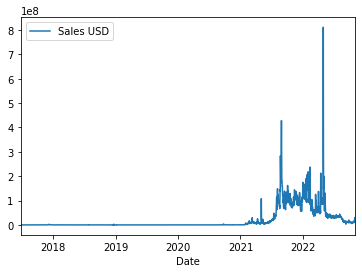

In [27]:
df_global_with_dummies.plot("Date", ["Sales USD"])
plt.savefig("SalesUSD.png", dpi=150)
plt.show()

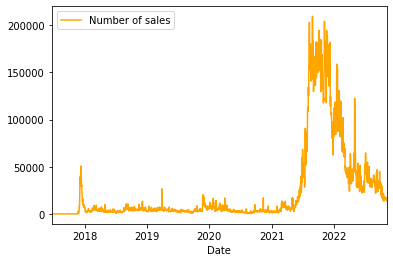

In [28]:
df_global_with_dummies.plot("Date", ["Number of sales"], color="orange")

# Add Price and Corresponding SVI

In [32]:
def generate_table(name, df_global_with_dummies):
    df_price = pd.read_csv('data/all_data_used/price_%s_alltime.csv'%name)
#     print(df_price.head())    
    df_price = df_price.rename(columns={"timestamp":"Date"})
    df_price = df_price.rename(columns={"avg":"avg_price"})
    df_price['Date'] = pd.to_datetime(df_price['Date']).dt.date
    
    df_SVI = pd.read_csv('data/SVI/merged_SVI_%s_all.csv'%name)
    df_SVI = df_SVI.rename(columns={"date":"Date"})
    df_SVI = df_SVI.rename(columns={name:"SVI_%s"%name})
    df_SVI['Date'] = pd.to_datetime(df_SVI['Date']).dt.date
    df_price[['Date','avg_price']].merge(df_SVI, how='left')
    
    df_global_and_collection = df_global_with_dummies.merge(df_SVI, how='left').merge(df_price[['Date','avg_price']], how='left')
    df_global_and_collection['LOG_avg_price'] = df_global_and_collection.apply(lambda row: np.log(row.avg_price), axis=1)
    df_global_and_collection.to_csv('data/final_tables/global_%s.csv'%name)
    return df_global_and_collection

In [72]:
def extend_table_column(name_list, df_target):
    
    for name in name_list:
        df_SVI = pd.read_csv('data/SVI/merged_SVI_%s_all.csv'%name)
        df_SVI = df_SVI.rename(columns={"date":"Date"})
        df_SVI = df_SVI.rename(columns={name:"SVI_%s"%name})
        df_SVI['Date'] = pd.to_datetime(df_SVI['Date']).dt.date
        df_target = df_target.merge(df_SVI[['Date','SVI_%s'%name]], how='left')
    
    for name in name_list:
        df_price = pd.read_csv('data/all_data_used/price_%s_alltime.csv'%name)
    #     print(df_price.head())    
        df_price = df_price.rename(columns={"timestamp":"Date"})
        df_price = df_price.rename(columns={"avg":"avg_price_%s"%name})
        df_price['Date'] = pd.to_datetime(df_price['Date']).dt.date
        df_target = df_target.merge(df_price[['Date','avg_price_%s'%name]], how='left')
        
    for name in name_list:
        df_target['LOG_avg_price_%s'%name] = df_target.apply(lambda row: np.log(row['avg_price_%s'%name]), axis=1)
        
    df_global_and_collection.to_csv('data/final_tables/global_all_extend_columns.csv')
    
    return df_target

In [67]:
name_list = ['Art Blocks','BAYC','cryptopunks', 'ENS','KnownOrigin','Mutant Ape Yacht Club',
            'OpenSea Shared Storefront', 'Otherdeed','Rarible','Uniswap','Zora']

In [73]:
df_test = extend_table(name_list, df_global_with_dummies)

In [74]:
df_test.columns[-30:]

Index(['SVI_ENS', 'SVI_KnownOrigin', 'SVI_Mutant Ape Yacht Club',
       'SVI_OpenSea Shared Storefront', 'SVI_Otherdeed', 'SVI_Rarible',
       'SVI_Uniswap', 'SVI_Zora', 'avg_price_Art Blocks', 'avg_price_BAYC',
       'avg_price_cryptopunks', 'avg_price_ENS', 'avg_price_KnownOrigin',
       'avg_price_Mutant Ape Yacht Club',
       'avg_price_OpenSea Shared Storefront', 'avg_price_Otherdeed',
       'avg_price_Rarible', 'avg_price_Uniswap', 'avg_price_Zora',
       'LOG_avg_price_Art Blocks', 'LOG_avg_price_BAYC',
       'LOG_avg_price_cryptopunks', 'LOG_avg_price_ENS',
       'LOG_avg_price_KnownOrigin', 'LOG_avg_price_Mutant Ape Yacht Club',
       'LOG_avg_price_OpenSea Shared Storefront', 'LOG_avg_price_Otherdeed',
       'LOG_avg_price_Rarible', 'LOG_avg_price_Uniswap', 'LOG_avg_price_Zora'],
      dtype='object')

In [75]:
df_test

,Date,Average USD,Active market wallets,Number of sales,Sales USD,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,...,LOG_avg_price_BAYC,LOG_avg_price_cryptopunks,LOG_avg_price_ENS,LOG_avg_price_KnownOrigin,LOG_avg_price_Mutant Ape Yacht Club,LOG_avg_price_OpenSea Shared Storefront,LOG_avg_price_Otherdeed,LOG_avg_price_Rarible,LOG_avg_price_Uniswap,LOG_avg_price_Zora
0,2017-06-23,53.70,8.0,19.0,1020.30,18.0,1.0,953.92,66.38,8.0,...,NaN,-2.098924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-06-24,59.09,17.0,21.0,1240.84,21.0,0.0,1240.84,0.00,9.0,...,NaN,-1.365092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-25,39.81,10.0,13.0,517.55,11.0,2.0,402.33,115.22,7.0,...,NaN,-1.927155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-26,30.33,14.0,14.0,424.63,14.0,0.0,424.63,0.00,6.0,...,NaN,-1.584745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-27,63.42,22.0,33.0,2092.91,32.0,1.0,2049.94,42.98,8.0,...,NaN,-1.228042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,2022-11-01,873.91,12203.0,17230.0,15057451.97,4812.0,12418.0,603213.51,14454238.46,7526.0,...,4.295615,4.379321,-1.462292,NaN,2.524680,-2.335731,0.516139,NaN,NaN,4.527317
1958,2022-11-02,1916.38,12225.0,15697.0,30081434.97,4117.0,11580.0,2624596.78,27456838.19,7401.0,...,4.306625,4.328362,-1.530471,-4.896860,2.582891,-2.562850,1.022398,NaN,-2.497490,-4.605170
1959,2022-11-03,1043.25,12464.0,16355.0,17062305.81,3895.0,12460.0,1112485.36,15949820.45,7487.0,...,4.171709,4.769991,-0.978549,-2.813411,2.494462,-2.052949,0.583643,NaN,-2.322209,NaN
1960,2022-11-04,1172.42,11724.0,14349.0,16823092.98,3854.0,10495.0,1091245.43,15731847.55,7090.0,...,4.181727,4.202387,-0.680245,NaN,2.491750,-1.970716,0.551771,-2.30961,NaN,NaN


# Extend rows

In [87]:
def generate_one_table(name, df_global_with_dummies):
    df_price = pd.read_csv('data/all_data_used/price_%s_alltime.csv'%name)
#     print(df_price.head())    
    df_price = df_price.rename(columns={"timestamp":"Date"})
    df_price = df_price.rename(columns={"avg":"avg_price"})
    df_price['Date'] = pd.to_datetime(df_price['Date']).dt.date
    valid_index = df_price['avg_price'].first_valid_index()
    
    df_SVI = pd.read_csv('data/SVI/merged_SVI_%s_all.csv'%name)
    df_SVI = df_SVI.rename(columns={"date":"Date"})
    df_SVI = df_SVI.rename(columns={name:"SVI_collection"})
    df_SVI['Date'] = pd.to_datetime(df_SVI['Date']).dt.date
#     df_price[['Date','avg_price']].merge(df_SVI, how='left')
    
    df_global_and_collection = df_global_with_dummies.merge(df_SVI, how='left').merge(df_price[['Date','avg_price']][valid_index:], how='right')
    df_global_and_collection['LOG_avg_price'] = df_global_and_collection.apply(lambda row: np.log(row.avg_price), axis=1)
    df_global_and_collection['collection_name'] = name
    
    return df_global_and_collection

In [90]:
def extend_row_table(name_list, df_global_with_dummies):
    dfs = []
    for name in name_list:
        df_one_collection = generate_one_table(name, df_global_with_dummies)
        dfs.append(df_one_collection)
    return pd.concat(dfs)

In [96]:
collection_dummies = pd.get_dummies(df_test['collection_name'])

In [100]:
df_row_extend = extend_row_table(name_list, df_global_with_dummies)

In [101]:
df_row_extend_with_dummies = pd.concat([df_row_extend, collection_dummies], axis=1)

In [103]:
df_row_extend_with_dummies.to_csv('data/final_tables/global_all_extend_rows.csv')

In [147]:
df_price_BAYC = pd.read_csv('data/all_data_used/price_BAYC_alltime.csv')

In [201]:
df_price_BAYC = df_price_BAYC.rename(columns={"timestamp":"Date"})
df_price_BAYC['Date'] = pd.to_datetime(df_price_BAYC['Date']).dt.date
df_price_BAYC = df_price_BAYC.rename(columns={"avg":"avg_price"})

In [194]:
df_SVI_BAYC = pd.read_csv('data/SVI/merged_SVI_BAYC_all.csv')
df_SVI_BAYC = df_SVI_BAYC.rename(columns={"date":"Date"})
df_SVI_BAYC = df_SVI_BAYC.rename(columns={"BAYC":"SVI_BAYC"})
df_SVI_BAYC['Date'] = pd.to_datetime(df_SVI_BAYC['Date']).dt.date

In [195]:
df_price_BAYC[['Date','avg']].merge(df_SVI_BAYC, how='left')

,Date,avg,SVI_BAYC
0,2016-11-06,NaN,NaN
1,2016-11-07,NaN,NaN
2,2016-11-08,NaN,NaN
3,2016-11-09,NaN,NaN
4,2016-11-10,NaN,NaN
...,...,...,...
2185,2022-11-01,73.377363,1101.0
2186,2022-11-02,74.189712,1065.0
2187,2022-11-03,64.826152,1144.0
2188,2022-11-04,65.478830,1740.0


In [192]:
df_SVI_BAYC

,Date,SVI_BAYC
0,2017-06-30,413
1,2017-07-01,343
2,2017-07-02,244
3,2017-07-03,224
4,2017-07-04,335
...,...,...
1482,2022-11-01,1101
1483,2022-11-02,1065
1484,2022-11-03,1144
1485,2022-11-04,1740


In [181]:
df_SVI_BAYC['Date'][0]

Timestamp('2017-06-30 00:00:00')

In [291]:
df_global_and_BAYC = df_global_with_dummies.merge(df_SVI_BAYC, how='left').merge(df_price_BAYC[['Date','avg_price']], how='left')

In [292]:
df_global_and_BAYC['LOG_avg_price'] = df_global_and_BAYC.apply(lambda row: np.log(row.avg_price), axis=1)

In [293]:
df_global_and_BAYC["Date"]

0       2017-06-23
1       2017-06-24
2       2017-06-25
3       2017-06-26
4       2017-06-27
           ...    
1956    2022-10-31
1957    2022-11-01
1958    2022-11-02
1959    2022-11-03
1960    2022-11-04
Name: Date, Length: 1961, dtype: object

In [294]:
df_global_and_BAYC.to_csv('data/final_tables/global_BAYC.csv')

In [295]:
df_global_and_BAYC.columns

Index(['Date', 'Average USD', 'Active market wallets', 'Number of sales',
       'Sales USD', 'Primary Sales', 'Secondary sales', 'Primary sales USD',
       'Secondary sales USD', 'Unique buyers', 'Unique sellers',
       'ΔAverage USD', 'ΔActive market wallets', 'ΔNumber of sales',
       'ΔSales USD', 'ΔPrimary Sales', 'ΔSecondary sales',
       'ΔPrimary sales USD', 'ΔSecondary sales USD', 'ΔUnique buyers',
       'ΔUnique sellers', 'ETH_Open', 'BTC_Open', 'Nasdaq_Open', 'USD_Open',
       'Oil_Open', 'Gold_Open', 'SVI_NFT', 'SVI_metaverse', 'Year_Month',
       'time_2017-06', 'time_2017-07', 'time_2017-08', 'time_2017-09',
       'time_2017-10', 'time_2017-11', 'time_2017-12', 'time_2018-01',
       'time_2018-02', 'time_2018-03', 'time_2018-04', 'time_2018-05',
       'time_2018-06', 'time_2018-07', 'time_2018-08', 'time_2018-09',
       'time_2018-10', 'time_2018-11', 'time_2018-12', 'time_2019-01',
       'time_2019-02', 'time_2019-03', 'time_2019-04', 'time_2019-05',
       '

In [110]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [115]:
df_global_with_dummies[['Date', 'Sales USD']].plot()
plt.show()

In [116]:
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
df_global_with_dummies[['Date', 'Sales USD']].plot_bokeh(kind='line', alpha=0.7,  x_axis_type="datetime");


TypeError: lineplot() got multiple values for argument 'x_axis_type'

In [118]:
from bokeh.plotting import figure, output_file, show

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

p.line(df_global_with_dummies['Date'], df_global_with_dummies['Sales USD'], color='navy', alpha=0.5)

show(p)